In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the dataset
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Finding the duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#there are no duplicates in the dataset

In [ ]:
#Understanding the data
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
#Finding the null values
df.isnull().sum().any()

np.False_

In [ ]:
#there are no null values

In [ ]:
#Find the shape as well as Rows & Columns of the data
df.shape
df.shape[0]

50

In [ ]:
# Statistical Analysis
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
'''
Insights based on the Statistical Analysis
1. From the "R&D Spend" column, we can see that mean and median are approximately same which means
that the startup spent from 0 ot 160000 i.e few startups spent 0 where few of them spent a lot.
2.From the "Marketing Spend" column, we can see that mean and median are approximately same which means
that the startup spent from 0 ot around 470000. i.e few startups spent 0 where few of them spent a lot.
3. In the "Marketing Spend", since median is little higher it might have a right-skewed distribution.
4. The standard deviation in "Marketing Spend" is high which.
'''

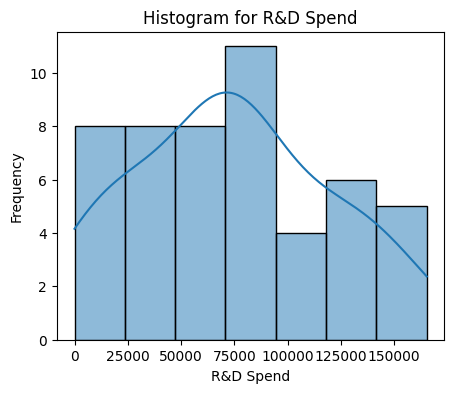

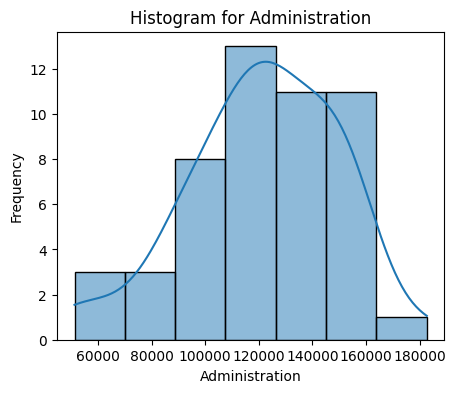

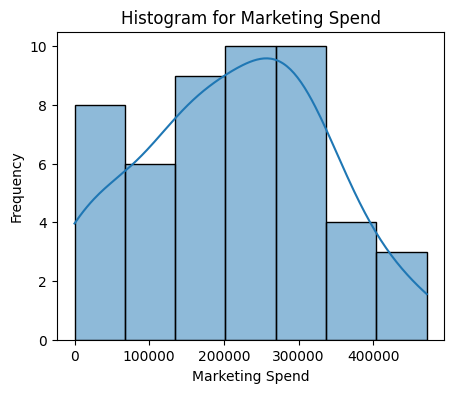

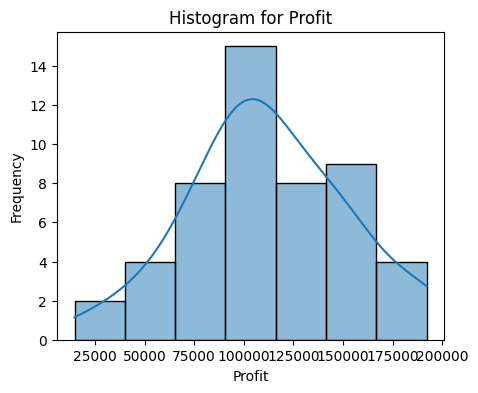

In [ ]:
# Histogram for all the columns
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
'''
Insights based on the Histogram
1. All the 4 columns "Marketing Spend", "Administration" and "Profit" have slightly
right-skewed distribution.
2. Each of these columns may have few outliers.
'''

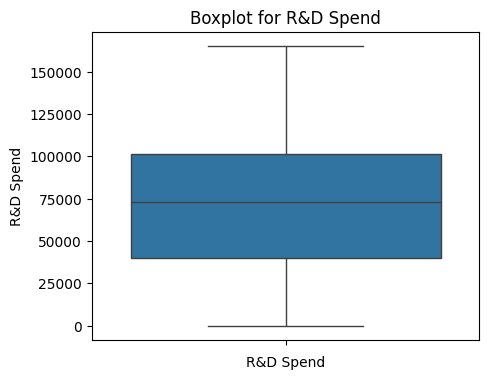

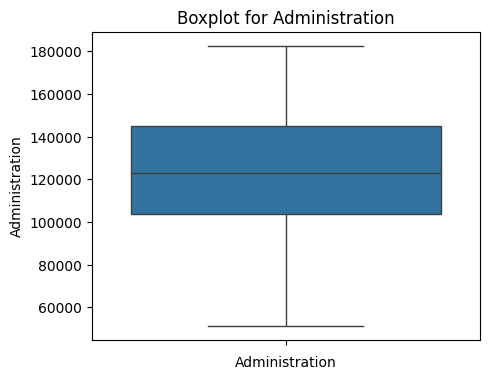

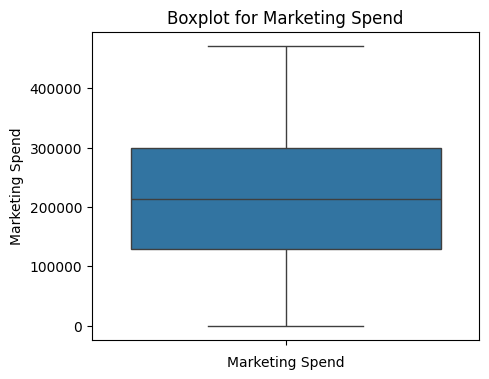

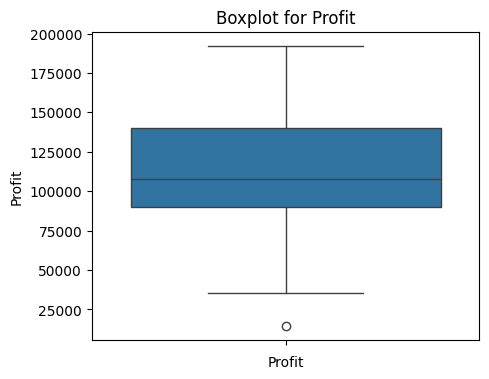

In [ ]:
# Boxplots for all the numeri
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,4))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)

In [ ]:
'''
Insights based on the box plot
1. Though coz of the right skewnes I thought it might have outliers. But the boxplot representation shows no outliers for all the columns.
2. Its only the profit column that has one outlier
3. Since its the target variable we wont be doing an cliping or any operation on that.
'''

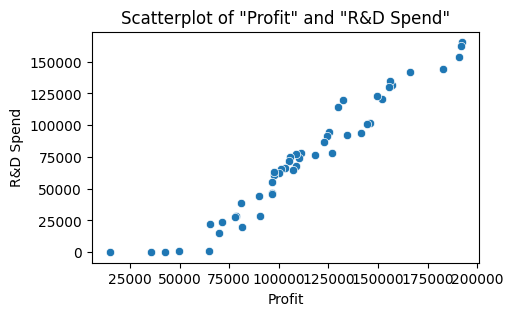

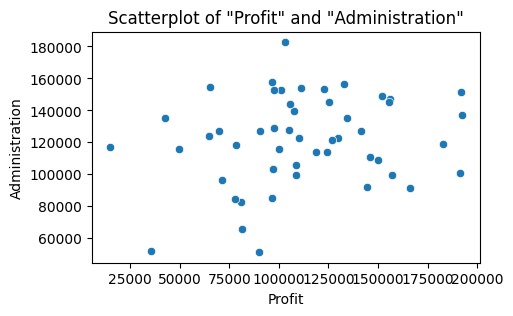

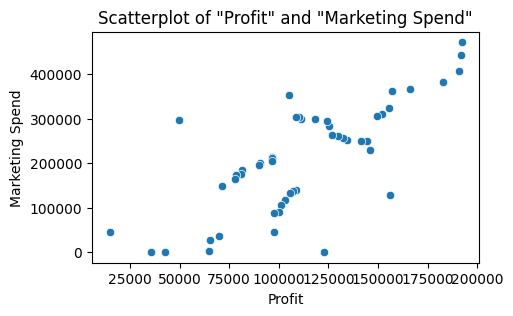

In [ ]:
#Scatterplot for Profit with other columns
for col in df.select_dtypes(include=np.number):
  if col != 'Profit':
    plt.figure(figsize = (5, 3))
    sns.scatterplot(x = 'Profit', y = col, data = df)
    plt.title(f'Scatterplot of "Profit" and "{col}"')
    plt.xlabel('Profit')
    plt.ylabel(col)
    plt.show()

In [ ]:
'''
Insights based on the scatter plot
1. From the Profit vs R&D spend, we can see that as R&D spend increases the profits are also
increasing.
2. From the Profit vs Marketing spend, we can see that as Marketing spend increases the profits are also
increasing. Though its not a direct indication as the R&D spend is also increasing.
3. From the Profit vs Administration spend, the data points are scattered and the trend
is not clear. This also concludes that Admin spend is not a good predictor of profit.
'''

In [ ]:
#Finding the unique no. and unique values of the categorical columns. This will help us with deciding what sort of
# data visualization and encoding can be done
categorical_column = df['State']
print(categorical_column.unique())

['New York' 'California' 'Florida']


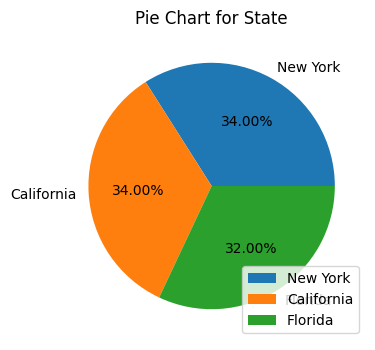

In [ ]:
# Pie Chart for "state" column
plt.figure(figsize=(5,4))
plt.pie(df['State'].value_counts(), labels=df['State'] .value_counts().index, autopct='%.2f%%')
plt.legend()
plt.title('Pie Chart for State')
plt.show()


In [ ]:
'''
Conclusions
1. From the chart we can see that the states New York & California have the same % of startups.
2. The state Florida has slightly lower % of startups.
'''

In [ ]:
#checking the no. of values in each of the categorical columns
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [ ]:
#Do the one hot encoding on the categorical columns
df = pd.get_dummies(df, columns=['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [ ]:
# Replacing False with 0 and True with 1
df.replace({False : 0, True : 1}, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


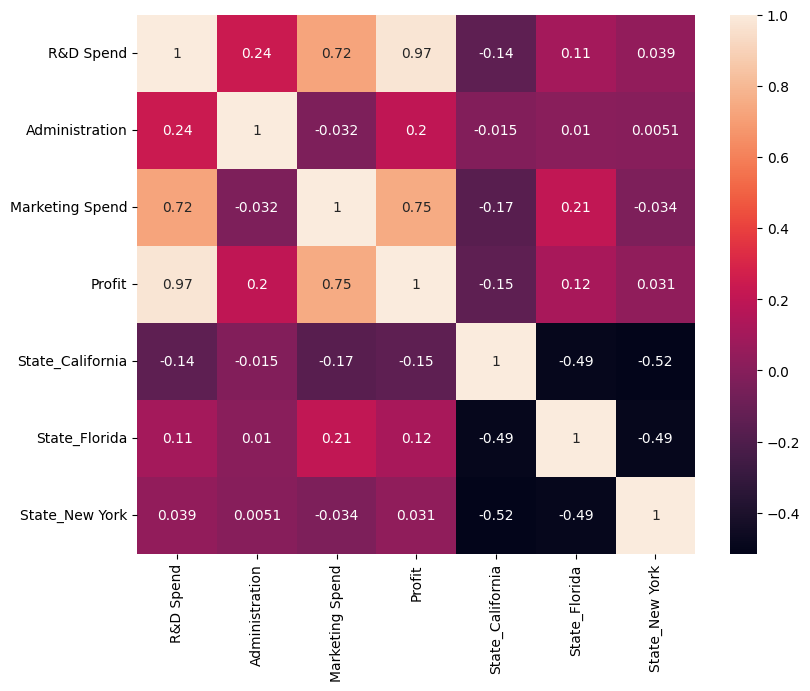

In [ ]:
# Correlation Analysis (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
'''
Correlation Analysis conclusion
1. Profit & R&D Spend are highly positively correlated nearing to the value 1.
2. Profit & Marketing Spend are positively correlated.
3. Profit & other columns have either weak or no correlation at all

Hence we can conclude that we can use "R&D spend" as the input variable for the target variable "Profit" .
'''

In [ ]:
'''
We are going to create 2 models ->
(1) Simple Linear Regression -> Profit ~ R&D Spend
(2) Multiple Linear Regression -> Profit ~ R&D Spend + Marketing Spend
'''

In [ ]:
#Linear Regression Model

In [ ]:
# Seperating input and output features
X= df[['R&D Spend']]
y= df['Profit']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score


print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.94
Testing R2 Score : 0.97


In [ ]:
#RMSE
print('Training RMSE :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Testing RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training RMSE : 9788.948781541976
Testing RMSE : 6557.48797938956


In [ ]:
'''
The difference between training and testing peformance is within 5% (which is acceptable)
The testing performance is slightly better.
Both the training and testing R2 scores are very high (close to 1).
This indicates that the model is performing well and is making
accurate predictions on both the training and testing data.
'''

In [ ]:
# We have achieved what we wanted with Linear Regression.
#Going for Multiple Regression just to see how it behaves, would the prediction
# accuracy be better.

#Multiple Regression

In [ ]:
# Seperating input and output features
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Creating the model
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.94
Testing R2 Score : 0.97


In [ ]:
#RMSE
print('Training RMSE :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Testing RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training RMSE : 9358.583115148496
Testing RMSE : 7073.857168705303


In [ ]:
'''
Conclusions
  1. The difference between training and testing peformance is within 5% (which is acceptable)
  2. There is no difference in the model performance with Multiple Regression.
  3. Both the training and testing R2 scores are very high (close to 1).
  This indicates that the model is performing well and is making
  accurate predictions on both the training and testing data.
  4. The RMSE score of training is slightly higher than the Testing. This indicates
    that the situation is unusual. THis might be due to small dataset

'''